# CS4287 MLP

In [ ]:
# Dominion Gbadamosi - 20243561 -- Ameen Popoola - 20231717
# code runs from start to finish with no errors
# link to existing implementation: https://github.com/Kelly-Ryan/CS4287-Multilayer-Perceptron/blob/main/MLP_Notebook.ipynb

In [ ]:
#Imports
import numpy as np
import seaborn as sbn
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import display

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Data Visualization

In [ ]:
#Using Panda library to read the dataset
dataset = "Healthcare-Diabetes.csv"
df = pd.read_csv(dataset)

In [ ]:
#Display the first few rows of the dataset
display(df.head())

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#Display the dataset's statistics
display(df.describe())

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


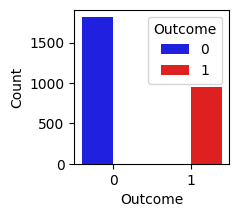

No Diabetes: 1816 entries
Diabetes: 952 entries


In [ ]:
""" A visual display of all entries where diabetes isn't detected
and where it is, plotted on a graph and the exact values printed below """

#Defining a custom color palette
custom_palette = {0: 'blue', 1: 'red'}  #0 for 'No Diabetes', 1 for 'Diabetes'

#display difference between counts of outcomes where diabetes is detected (1) vs when it isn't (0)
plt.figure(figsize=(2, 2))

sbn.countplot(data = df, x ='Outcome',hue='Outcome', palette=custom_palette)
plt.ylabel('Count')
plt.show()

# Show the exact number of rows where diabetes is detected and where it is not
outcome_counts = df['Outcome'].value_counts()
no_diabetes_count = outcome_counts[0]
diabetes_count = outcome_counts[1]

print(f'No Diabetes: {no_diabetes_count} entries')
print(f'Diabetes: {diabetes_count} entries')



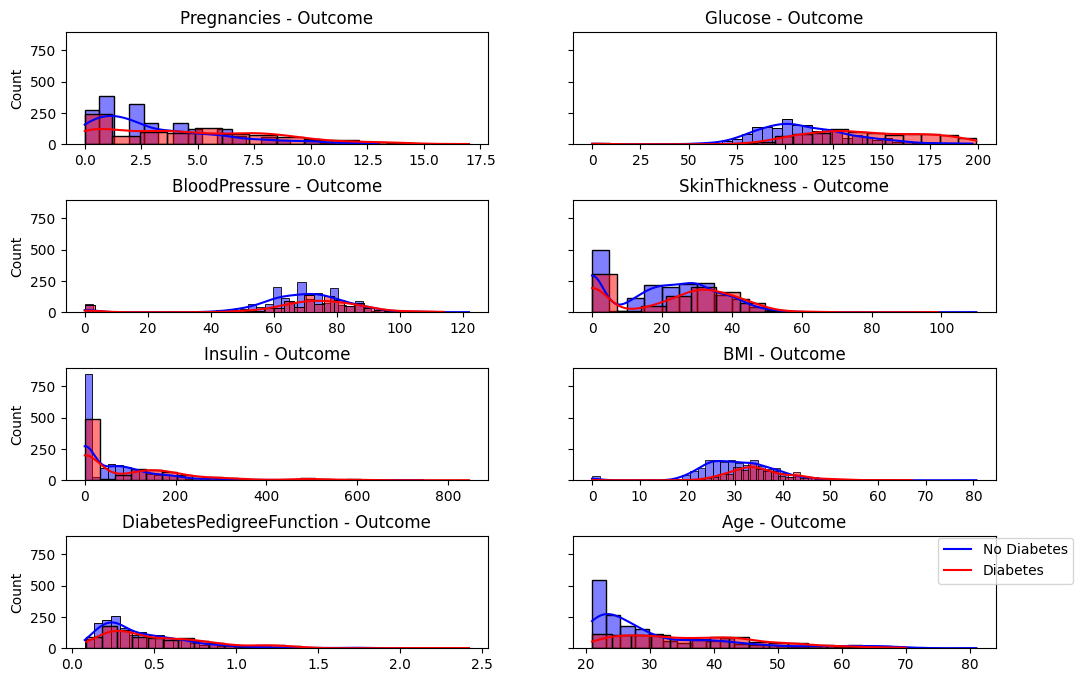

In [ ]:
""" A visual display of all entries for each numerical attribute where diabetes is detected or not.
Like above blue means diabetes is not detected and red means it is """

#Defining a custom color palette
custom_palette = {0: 'blue', 1: 'red'}  #0 for 'No Diabetes', 1 for 'Diabetes'

#create subplots for each numerical attribute (not including Id)
num_atts = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
            'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
outcome = 'Outcome'

num_cols = 2 #Two columns for "Diabetes" and "No Diabetes"
num_rows = (len(num_atts) + 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 2 * num_rows), sharey=True)

#loop through the numerical attributes provided in "num_atts" and plot histograms for each
for i, attr in enumerate(num_atts):
    for j, outcome_class in enumerate([0, 1]):
        subset = df[df['Outcome'] == outcome]
        ax = axes[i // num_cols, i % num_cols]
        sbn.histplot(data=df[df[outcome] == outcome_class], x= attr, kde=True, ax=ax, color=custom_palette[outcome_class])
        ax.set_title(f'{attr} - Outcome')
        ax.set_xlabel('')

#add a legend outside the plots
legend = plt.legend(labels=["No Diabetes", "Diabetes"], loc='upper right', bbox_to_anchor=(1.2, 1.05))


#remove empty subplots (if there are any)
if len(num_atts) % 2 == 1:
    fig.delaxes(axes[-1, -1])


plt.subplots_adjust(hspace= 0.5)
plt.show()


##Preprocessing (Normlisation) of the data

In [ ]:
"""Splitting the data into the feature matrix and target variable (X and Y respectively)
Then use the StandardScaler to normalise the data"""

#Define the feature matrix (X) and target variable (Y)
X = df.drop(columns=['Outcome']) #use all numerical attributes in the data set as features
Y = df['Outcome'] # 'Outcome' is the target variable

#split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#normalise the data using StandardScaler
standard_scaler = StandardScaler()

X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

##Creating the Model

In [ ]:
# Setting a random seed for reproducibility
np.random.seed(1671)

In [ ]:


# Printing the number of samples in the training and test sets
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test')

# Define and compile the neural network model
model = tf.keras.Sequential([
    # Input layer with 32 units and ReLU activation function
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    # Output layer for binary classification with sigmoid activation function
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compiling the model with Adam optimizer and loss function
model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])

# Training the model using the training data and validating it on the test data
resHistory = model.fit(X_train, Y_train, epochs=200, batch_size=32, validation_data=(X_test, Y_test))

2214 train samples
554 test
Epoch 1/200
70/70 [==============================] - 2s 14ms/step - loss: 0.6169 - accuracy: 0.6978 - val_loss: 0.5386 - val_accuracy: 0.7870
Epoch 2/200
70/70 [==============================] - 0s 3ms/step - loss: 0.5159 - accuracy: 0.7850 - val_loss: 0.4896 - val_accuracy: 0.7726
Epoch 3/200
70/70 [==============================] - 0s 3ms/step - loss: 0.4826 - accuracy: 0.7904 - val_loss: 0.4754 - val_accuracy: 0.7708
Epoch 4/200
70/70 [==============================] - 0s 3ms/step - loss: 0.4679 - accuracy: 0.7940 - val_loss: 0.4695 - val_accuracy: 0.7708
Epoch 5/200
70/70 [==============================] - 0s 3ms/step - loss: 0.4596 - accuracy: 0.7918 - val_loss: 0.4661 - val_accuracy: 0.7726
Epoch 6/200
70/70 [==============================] - 0s 3ms/step - loss: 0.4540 - accuracy: 0.7936 - val_loss: 0.4638 - val_accuracy: 0.7726
Epoch 7/200
70/70 [==============================] - 0s 3ms/step - loss: 0.4496 - accuracy: 0.7954 - val_loss: 0.4611 - val_a

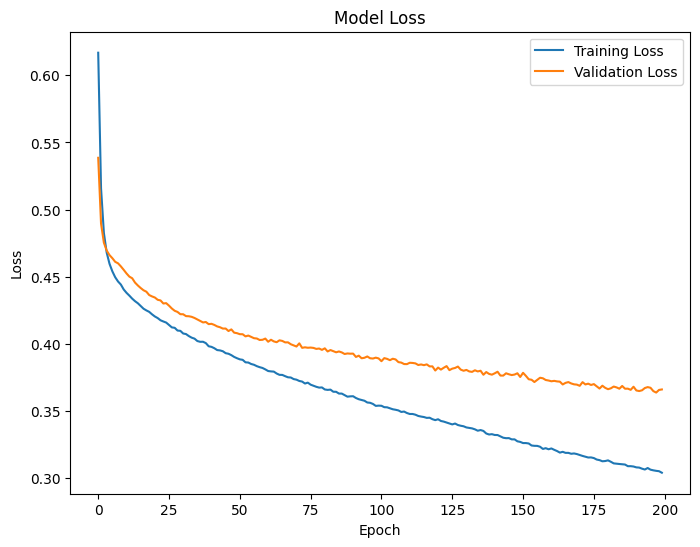

In [ ]:
# Plotting training & validation loss values
plt.figure(figsize=(8, 6))
plt.plot(resHistory.history['loss'], label='Training Loss')
plt.plot(resHistory.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

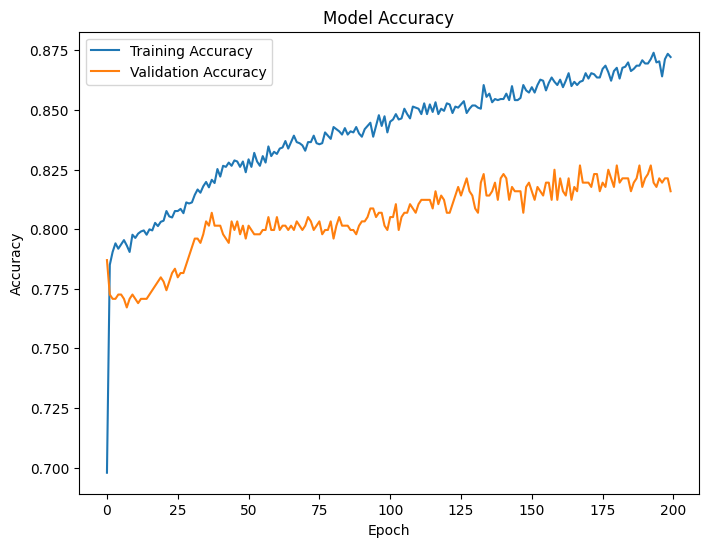

In [ ]:
# Plotting training & validation accuracy values
plt.figure(figsize=(8, 6))
plt.plot(resHistory.history['accuracy'], label='Training Accuracy')
plt.plot(resHistory.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()